### Neural Networks

 - Basically a set of inter-connected nodes or neurons or perceptrons.
     - Typically consists of layers of such neurons.
     - Each neuron in a given layer is connected to all the neurons of the previous layers through a weight and an activatio function.
     - Activation function is used to generate the non-linearity in the model that is to be trained with the data in hand.
 Let us first consider how a single layer neural network would look like. For our purposes let's consider our input to be a three dimensional vector. For example let's say we are monitoring the Pressure, temperature and humidity at a weather station. the vector is $\vec{V}=\left(P, T, H\right)$. We would also need the label or the output. In this case this can be the chances of rain, $R$.

<img src="images/linearneuralnetwork.PNG" width="500" height="250">


$R'$ is the output of the untrained linear neural net and is given by:

\begin{equation}
R'=1\times w_0+P\times w_1+T\times w_2+H\times w_3
\end{equation}

The difference between the output of the untrained model, $R'$ and the actual value $R$, a function of the difference $\Delta=f\left(R-R'\right)$ is used to optimize the weights $w_i$ using optimization methods such as Gradient Descent. Note that we have a node to denote the offset whose input is always $1$ (weight given by $w_0$). As a rule of thumb, in the final representation and as well counting the number of neurons in each layer this is mostly omitted. In the above example the neural network has single layer with three neurons. 

### Training a linear model using a  neural network

- We will try to first model a simple linear equation using a single layer neural network.
    - $y=3x+5$
    - The neural net model would look like $y'= w_0+w_1x$
    
We will first simulate some of the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 5, 0.5)

In [3]:
y = 3*x+5 #+ .001*np.random.randn(len(x))

Text(0, 0.5, 'y')

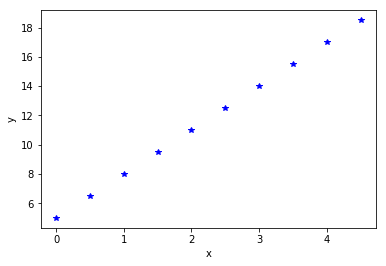

In [4]:
plt.plot(x, y, 'b*')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
x = np.float32(x.reshape(-1, 1))
y = np.float32(y.reshape(-1, 1))

In [6]:
#Importing torch
import torch
import torch.nn as nn
from torch.autograd import Variable

In [7]:
#Create a class for the training
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_dim = input_size
        self.output_dim = output_size
        self.linear = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        output = self.linear(x)
        return output

In [8]:
#Instantiate the model
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

What else is required?

- A loss function, in order to compare the output of the neural network to the real life value (in our case simulated y)
- A simple loss function would be the mean squared error:
    - $MSE = \frac{1}{n}\Sigma_i\left(\hat{y}_i-y_i\right)^2$
        - $\hat{y}_i$: predicted value
        - $y_i$: true value

In [9]:
#Define the loss function
criterion = nn.MSELoss(reduction='mean')

However learning still needs to takes place. The learning takes place by feeding back the loss function to the parameters in such a way that the loss function is minimized. 

- $\theta := \theta - \eta.\nabla_{\theta}$, where 
    - $\theta$ represents the parameters, 
    - $\eta$ is the learning rate
    - $\nabla_{\theta}$ is the gradient of the loss function w.r.t. $\theta$
- What are the parameters in this case?
    - $\alpha$ and $\beta$ in $y=\alpha x + \beta$
    - After successful learning we should obtain: $\alpha=3$, $\beta=5$

In [10]:
#Define learning rate
lr = 0.1
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Now it is time to train. A few points before training:

- Generally once has to go through the dataset several time in order to properly optimize the weights, we fix the number of 'epochs' initially
- Since the inputs will generally be numpy array we have to convert them into torch tensors first.
- While going through each epoch, we compute the outputs and obtain the loss.
- The loss is then used to compute the gradients which will be used to update the parameters

In [11]:
nb_epoch = 100

In [12]:
epoch=0
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(x))
    labels = Variable(torch.from_numpy(y))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    print('Epoch {},  Loss: {}'.format(epoch, loss.data))

Epoch 1,  Loss: 156.2805938720703
Epoch 2,  Loss: 52.39402389526367
Epoch 3,  Loss: 18.221067428588867
Epoch 4,  Loss: 6.912304401397705
Epoch 5,  Loss: 3.109316349029541
Epoch 6,  Loss: 1.7765237092971802
Epoch 7,  Loss: 1.2622603178024292
Epoch 8,  Loss: 1.0242156982421875
Epoch 9,  Loss: 0.883813202381134
Epoch 10,  Loss: 0.7817903757095337
Epoch 11,  Loss: 0.6980701684951782
Epoch 12,  Loss: 0.625486433506012
Epoch 13,  Loss: 0.5611651539802551
Epoch 14,  Loss: 0.5036938190460205
Epoch 15,  Loss: 0.45218509435653687
Epoch 16,  Loss: 0.40596917271614075
Epoch 17,  Loss: 0.36448490619659424
Epoch 18,  Loss: 0.32724258303642273
Epoch 19,  Loss: 0.29380661249160767
Epoch 20,  Loss: 0.26378709077835083
Epoch 21,  Loss: 0.23683494329452515
Epoch 22,  Loss: 0.21263675391674042
Epoch 23,  Loss: 0.19091089069843292
Epoch 24,  Loss: 0.1714048832654953
Epoch 25,  Loss: 0.15389180183410645
Epoch 26,  Loss: 0.138168066740036
Epoch 27,  Loss: 0.12405100464820862
Epoch 28,  Loss: 0.11137615889310

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([[3.0040]], requires_grad=True), Parameter containing:
 tensor([4.9879], requires_grad=True)]

In [14]:
with torch.no_grad():
    predicted = model.forward(inputs).data.numpy()

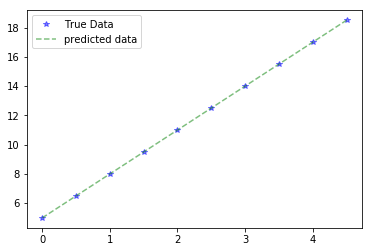

In [15]:
plt.plot(x, y, 'b*', label='True Data', alpha=0.5)
plt.plot(x, predicted, 'g--', label = 'predicted data', alpha=0.5)
plt.legend(loc='best')

### What about non-linearity?

The above example was about linear regression and hence a linear model could easily model the sample data. However we want to be able to data that is non-linear as well. Non-linearity is introduced in Neural networks through what are known as activation function. A well known activation function is the Sigmoid function which is given by :

\begin{equation}
S(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{e^z+1}
\end{equation}

If you plot the sigmoid function this is what it looks like:

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

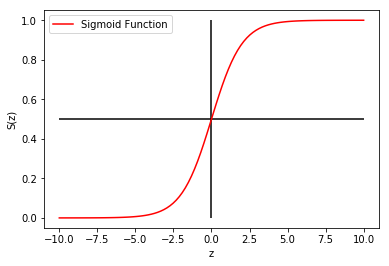

In [17]:
z = np.linspace(-10, 10, num=100 )
plt.plot(z, sigmoid(z), 'r-', label='Sigmoid Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('S(z)')
plt.hlines(y=0.5, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=1)

#### ReLU activation
There are a few other popular activation functions as well. A particularly popular one is the ReLU (Rectified Linear Unit ) activation which looks like:

\begin{equation}
R\left(x\right) = 0, x<0 \\
R\left(x\right) = x, x>0
\end{equation}

In [18]:
def relu(x):
    if x<=0:
        output=0.0
    elif x>0:
        output=x
    return output

In [19]:
relu_vec = np.vectorize(relu)

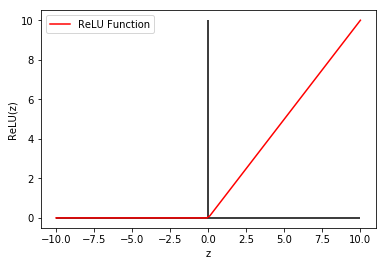

In [20]:
z = np.linspace(-10, 10, num=100)
plt.plot(z, relu_vec(z), 'r-', label='ReLU Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.hlines(y=0, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=10)

In order to enable non-linearity in our models we apply activation function to each node or neuron of a layer.

<img src="images/linearneuralnetworkplusactivation.PNG" width="500" height="250">

In the above diagram we see the activation function applied to the final layer which has a single neuron in it. In general, activation functions are applied to all the neurons in each layer, with each neuron being applied an activation function. 

In order to maximize the effectiveness of neural network we need to add more layers of network. This combined with the activation function will allow us to model complex data which has non-trivial relationship between the features and the labels:

<img src="images/multilayerneuralnet.png" width="500" height="250">

#### Softmax activation
The softmax activation function is another highly popular activation function which is usually used in the final layer when doing multiclass-classification using neural networks. Suppose we want to apply softmax to the output of a neural network classfier trying to classify 10 types of images with classes $k=1,2..10$. The output layer would thus have 10 layers. The softmax activated output for the i$^{th}$ neuron of the final layer would be thus given by 


\begin{equation}
P\left(y=2|x\right) = \frac{e^{x^Tw_j}}{\Sigma_k e^{x^Tw_k}}
\end{equation}

#### Backpropagation

As we can see that a neural network can very complicated and perform parameter updates (here the weight $w_{ij}$), we will need to compute the gradient at each node. This is known as backpropagation as the error obtained by comparing the output with the actual value using a loss function is then used to compute the gradients of the parameters.